In [27]:
import numpy as np 
import math
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from numpy.polynomial.polynomial import polyfit

In [28]:
# data = pd.read_csv("titanic.csv")

In [29]:
# data

In [30]:
# data = data.drop(columns=['SibSp', 'Ticket', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Name'])

In [31]:
# data

In [32]:
# titanic = pd.get_dummies(data, drop_first=True)

In [33]:
# titanic.head()

In [34]:
data = pd.read_csv("../knn/train", names=["gender", "height", "weight"])

In [35]:
data = data.head(50)

In [36]:
zero_and_one = ( (data['weight']- min(data['weight']) ) / ( (max(data['weight'])) -min(data['weight']) ) )

In [37]:
zero_and_one

5640    0.439155
8220    0.315860
2415    0.669834
7442    0.276764
3182    0.768020
8729    0.157307
7115    0.236020
4574    0.567122
4109    0.651875
4141    0.660358
9637    0.514673
4727    0.910453
6012    0.445538
9837    0.480336
9022    0.333415
6628    0.229960
8661    0.159216
6769    0.178509
7949    0.268352
2475    0.608203
7228    0.273412
9981    0.109481
8142    0.108066
3529    0.564028
5121    0.385933
6121    0.211217
715     0.664106
3889    0.735704
8390    0.554795
9784    0.156745
8258    0.282477
8506    0.313370
1524    1.000000
1695    0.375611
4829    0.671588
2672    0.585643
3803    0.696594
6339    0.416271
8602    0.283057
4370    0.652509
5134    0.345675
5846    0.096063
7416    0.000000
8528    0.366270
3285    0.780082
6285    0.254286
9327    0.367376
3614    0.626640
2824    0.583455
4904    0.749775
Name: weight, dtype: float64

In [38]:
data['normalized'] = zero_and_one

In [39]:
data

,gender,height,weight,normalized
5640,Female,66.766157,152.944405,0.439155
8220,Female,63.881197,137.170886,0.315860
2415,Male,68.720243,182.455923,0.669834
7442,Female,62.834020,132.169244,0.276764
3182,Male,70.962617,195.017206,0.768020
8729,Female,64.024722,116.886773,0.157307
7115,Female,60.284801,126.956702,0.236020
4574,Male,68.070190,169.315687,0.567122
4109,Male,68.017281,180.158380,0.651875
4141,Male,72.152094,181.243648,0.660358


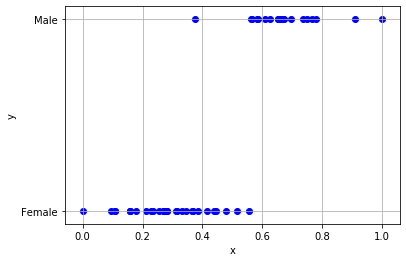

In [40]:
%matplotlib inline 
plt.scatter(data['normalized'], data['gender'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [41]:
data['normalized-gender'] = pd.get_dummies(data['gender'], drop_first=True)

In [42]:
data

,gender,height,weight,normalized,normalized-gender
5640,Female,66.766157,152.944405,0.439155,0
8220,Female,63.881197,137.170886,0.315860,0
2415,Male,68.720243,182.455923,0.669834,1
7442,Female,62.834020,132.169244,0.276764,0
3182,Male,70.962617,195.017206,0.768020,1
8729,Female,64.024722,116.886773,0.157307,0
7115,Female,60.284801,126.956702,0.236020,0
4574,Male,68.070190,169.315687,0.567122,1
4109,Male,68.017281,180.158380,0.651875,1
4141,Male,72.152094,181.243648,0.660358,1


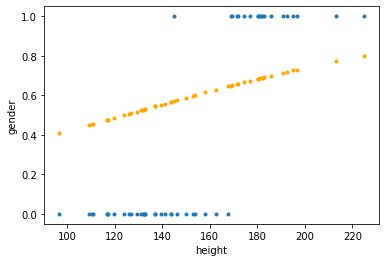

In [43]:
b, m = polyfit(data['weight'], data['normalized-gender'], 1)

z = 1/(1 + np.exp(- (m*data['weight']+b) )) 

plt.plot(data['weight'], data['normalized-gender'], '.')
plt.plot(data['weight'], z, '.', color='orange')
plt.xlabel('height')
plt.ylabel('gender')
plt.show()

In [44]:
log = LogisticRegression()
x = data['normalized']
x = x.values.reshape(-1,1)
log.fit(x, data['normalized-gender'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predictions = log.predict(x)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1], dtype=uint8)

In [46]:
print(classification_report(data['normalized-gender'],predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.75      0.86        20

    accuracy                           0.90        50
   macro avg       0.93      0.88      0.89        50
weighted avg       0.91      0.90      0.90        50



In [47]:
# Y = data['normalized-gender']

# lr = LogisticRegression()
# lr.fit(x, Y)

# plt.scatter(x.ravel(), Y, color='black', zorder=20)

# def model(x):
#     return 1 / (1 + np.exp(-x))

# # X_test = np.linspace(-5, 15, 300)
# loss = model(x * lr.coef_ + lr.intercept_).ravel()

# plt.plot(x, loss, color='red')


# plt.ylabel('normalized-gender')
# plt.xlabel('normalized-weight')
# plt.show()

In [48]:
test = pd.read_csv("../knn/test", names=["gender", "height", "weight"])
test['normalized-gender'] = pd.get_dummies(test['gender'], drop_first=True)

In [49]:
x_test = test['weight']
x_test = x_test.values.reshape(-1,1)
log.fit(x_test, test['normalized-gender'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = log.predict(x_test)
predictions

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [51]:
print(classification_report(test['normalized-gender'],predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       997
           1       0.90      0.90      0.90      1002

    accuracy                           0.90      1999
   macro avg       0.90      0.90      0.90      1999
weighted avg       0.90      0.90      0.90      1999



In [52]:
test

,gender,height,weight,normalized-gender
1340,Male,61.310798,150.316449,1
2041,Male,71.035595,214.475994,1
2431,Male,66.798977,173.208632,1
4671,Male,69.768653,199.672843,1
8719,Female,60.333372,102.256838,0
...,...,...,...,...
7265,Female,62.594759,145.987787,0
4393,Male,69.944080,196.178101,1
8868,Female,65.017087,137.568797,0
2178,Male,66.782187,176.611993,1
